# Equivalent Layer technique for estimating magnetization application for Diorama intrusion of Goias Alkaline Province (GAP)

#### Importing libraries

In [1]:
% matplotlib inline 

In [40]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import pandas as pd
import string as st

from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

In [3]:
notebook_name = 'Diorama_intrusion_EQL_magdirection.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Open a dictionary

In [6]:
results_diorama = dict()

#### Saving files

In [7]:
saved_files = []

## Loading real data for Montes claros complex

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

## Survey information

In [9]:
print 'Shape : (%.0f,%.0f)'% data['shape'] 
print 'Number of data: %.1f' % data['N']
print 'dx: %.1f m' % data['dx']
print 'dy: %.1f m ' % data['dy']

Shape : (78,19)
Number of data: 1506.0
dx: 98.0 m
dy: 502.0 m 


## Main field

In [10]:
inc_gf,dec_gf = data['main_field'][0],data['main_field'][1] 

In [11]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -19.5 degree
Main field declination: -18.5 degree


## Real data visualization for Diorama intrusion 

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


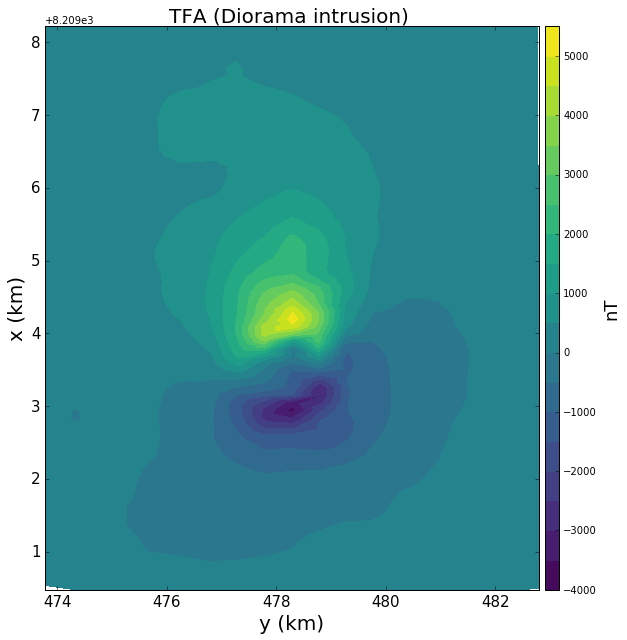

In [12]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.tricontourf(1e-3*data['y'],1e-3*data['x'],data['tfa_12'],20, cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.title('TFA (Diorama intrusion) ', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)

file_name = 'figs/Diorama_decimated_12'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

## Generating the layer with my function 

In [13]:
h = 200.

#### Generating a layer

In [14]:
xs = data['x']

In [15]:
ys = data['y']

In [16]:
zs = h*np.ones_like(xs)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [17]:
i_pos = 1500

In [18]:
it_max = 30

In [19]:
it_marq = 15

In [20]:
lamb = 10.
dlamb = 100.

In [21]:
eps_i = 1e-4
eps_e = 1e-4

In [22]:
mu_pos = 1e2

In [23]:
m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
    data['tfa_12'],data['x'],data['y'], data['z']
    ,xs,ys,zs,inc_gf,dec_gf,-71.,-70.,lamb,dlamb,i_pos,it_max,it_marq,eps_i,eps_e,mu_pos)

i = 0
4.30287659994e-11
-71.1438463456 -71.5516117703
0.0214836986957
i = 1
4.3036550637e-11
-71.2698237787 -73.0677538078
0.0206728215347
i = 2
4.30415367334e-11
-71.3794242989 -74.5482521882
0.0199157558977
i = 3
4.30440473862e-11
-71.4740069519 -75.9929969022
0.0192053264774
i = 4
4.30443688254e-11
-71.5548126212 -77.4021091985
0.0185390948502
i = 5
4.30427488521e-11
-71.6229746347 -78.7758484666
0.017913560669
i = 6
4.30394049011e-11
-71.6795287554 -80.1145912155
0.0173255201157
i = 7
4.30345282276e-11
-71.7254229503 -81.4187964115
0.0167717239792
i = 8
4.30282883489e-11
-71.7615216417 -82.6890599028
0.0162505839942
i = 9
4.30208317613e-11
-71.788618785 -83.9259693696
0.0157581276988
i = 10
4.30122915257e-11
-71.8074350942 -85.1301864609
0.0152922666253
i = 11
4.30027807481e-11
-71.8186369779 -86.3023977265
0.0148508256399
i = 12
4.29924035822e-11
-71.8228356077 -87.4433453292
0.0144324709479
i = 13
4.29812521326e-11
-71.8205956889 -88.5537662029
0.0140349293611
i = 14
4.2969411126

4.11248274013e-11
-66.3255020222 -126.207037935
0.000662870597494
i = 116
4.11041711562e-11
-66.2823953164 -126.272837385
0.000649391735559
i = 117
4.10835188619e-11
-66.2395479189 -126.337064391
0.000636409331171
i = 118
4.1062871746e-11
-66.1969569218 -126.399760061
0.000623901879102
i = 119
4.10422310045e-11
-66.1546194564 -126.460964264
0.000611848869815
i = 120
4.10215978019e-11
-66.1125326125 -126.520715976
0.00060023401046
i = 121
4.10009732568e-11
-66.07069351 -126.579053047
0.000589038853508
i = 122
4.09803584557e-11
-66.0290994035 -126.636011842
0.000578241617144
i = 123
4.09597544759e-11
-65.9877475865 -126.691627654
0.000567825346001
i = 124
4.0939162366e-11
-65.9466353904 -126.745934735
0.000557773858956
i = 125
4.09185831476e-11
-65.9057601852 -126.798966338
0.00054807171183
i = 126
4.08980178151e-11
-65.8651193789 -126.850754747
0.000538704161984
i = 127
4.0877467337e-11
-65.8247104171 -126.901331311
0.00052965713468
i = 128
4.08569326562e-11
-65.7845312044 -126.95072573

3.90995093055e-11
-63.0325101268 -127.795139216
0.000149648874043
i = 228
3.90847932849e-11
-63.0126842241 -127.78848907
0.000148686081632
i = 229
3.90701306874e-11
-62.9929486578 -127.781815177
0.000147730153273
i = 230
3.90555213058e-11
-62.973302621 -127.775119495
0.000146780965411
i = 231
3.90409649343e-11
-62.9537453267 -127.768403899
0.000145838401424
i = 232
3.90264613684e-11
-62.9342760067 -127.761670183
0.000144902351141
i = 233
3.90120104046e-11
-62.9148939111 -127.754920064
0.000143972710351
i = 234
3.89976118408e-11
-62.8955983078 -127.748155189
0.000143049380392
i = 235
3.89832654759e-11
-62.8763884818 -127.741377131
0.000142132267738
i = 236
3.89689711103e-11
-62.8572637342 -127.734587396
0.000141221283638
i = 237
3.89547285452e-11
-62.8382233823 -127.727787428
0.000140316343775
i = 238
3.89405375831e-11
-62.8192667584 -127.720978606
0.000139417367946
i = 239
3.89263980276e-11
-62.8003932097 -127.714162252
0.000138524279783
i = 240
3.89123096835e-11
-62.7816020975 -127.70

### Visualization of the convergence

In [24]:
phi = (np.array(phi)/data['x'].size)

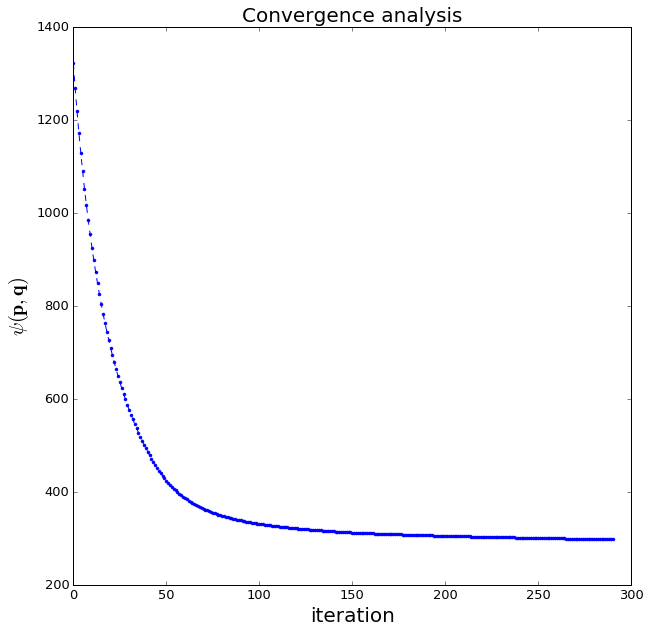

In [25]:
title_font = 20
bottom_font = 18
plt.close('all')
plt.figure(figsize=(8,8), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.plot(phi, 'b--')
plt.plot(phi, 'b.')

plt.title('Convergence analysis', fontsize=title_font)
plt.xlabel('iteration', fontsize = title_font)
plt.ylabel('$\psi (\mathbf{p}, \mathbf{q})$', fontsize = title_font)
plt.tick_params(labelsize=13)

file_name = 'figs/Diorama_intrusion_convergence_LM_NNLS'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

### Estimated magnetization direction

In [26]:
print (inc_est,dec_est)

(-61.95128561822446, -127.38124195368313)


### Comparison between observed data and predicted data

In [27]:
pred = fc.tfa_layer(data['x'],data['y'],data['z'],
                    xs,ys,zs,inc_gf,dec_gf,m_LM,inc_est,dec_est)

In [28]:
res = pred - data['tfa_12']

In [29]:
r_norm,r_mean,r_std = fc.residual(data['tfa_12'],pred)

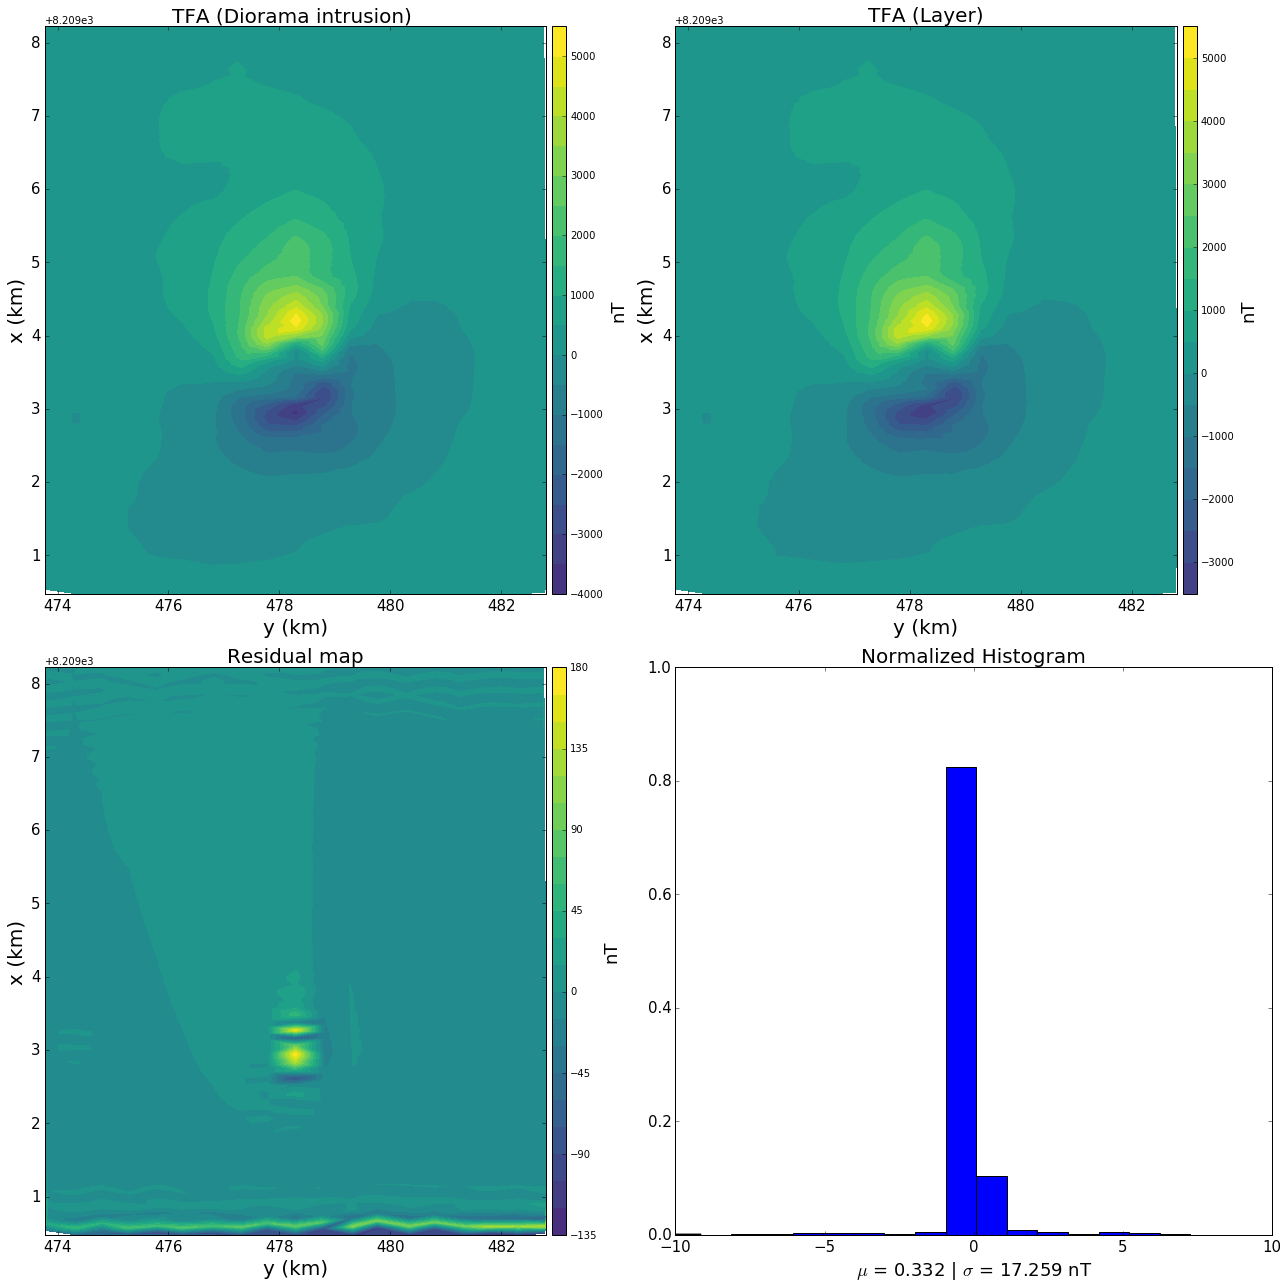

In [30]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(18,18), tight_layout=True)

ranges = saturation_factor*np.abs([data['tfa_12'].max(), 
                                   data['tfa_12'].min(),
                                   pred.max(), pred.min()]).max()

r_ranges = saturation_factor*np.abs([res.max(), res.min()]).max()

plt.subplot(2,2,1)
plt.tricontourf(1e-3*data['y'], 1e-3*data['x'], data['tfa_12'], 20, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.title('TFA (Diorama intrusion) ', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)

plt.subplot(2,2,2)
plt.tricontourf(1e-3*data['y'],1e-3*data['x'], pred, 20, cmap='viridis',  vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.title('TFA (Layer)', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)

plt.subplot(2,2,3)
plt.tricontourf(1e-3*data['y'],1e-3*data['x'], res, 20, cmap='viridis',  vmin=-r_ranges, vmax=r_ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.title('Residual map', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)


plt.subplot(2,2,4)
plt.xlabel('$\mu$ = %.3f | $\sigma$ = %.3f nT' % (r_mean, r_std),
           fontsize = bottom_font)
nbins = int((np.max(r_norm - np.min(r_norm))))
plt.hist(r_norm,bins=nbins,normed=True)
plt.ylim(0.,1.)
plt.xlim(-10., 10.)
plt.title('Normalized Histogram',fontsize=title_font)
plt.tick_params(labelsize=15)

file_name = 'figs/Diorama_intrusion_LM_NNLS'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

### Estimated magnetic moment within the layer

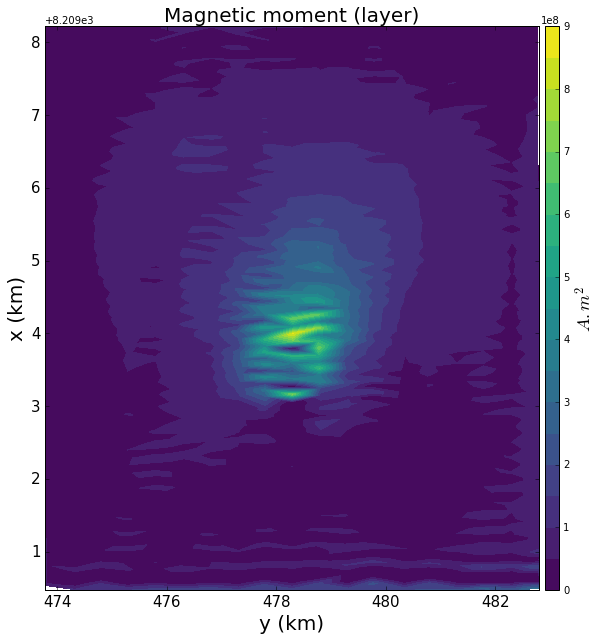

In [31]:
title_font = 20
bottom_font = 18
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.tricontourf(1e-3*ys,1e-3*xs,m_LM,20,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('$A.m^2$',size=bottom_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.title('Magnetic moment (layer)', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)

file_name = 'figs/Diorama_intrusion_moment_positive_LM_NNLS'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

### Reduction to the pole

In [32]:
G_rtp = fc.sensitivity_mag(data['x'],data['y'],data['z'],
                       xs,ys,zs,90.,0.,90.,0.)

In [33]:
tfa_rtp = np.dot(G_rtp,m_LM)

#### Visualization of a reduction to the pole

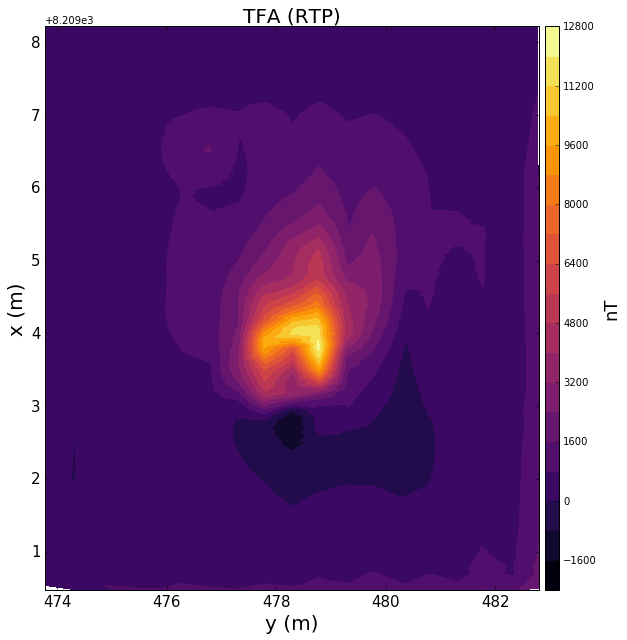

In [34]:
title_font = 20
bottom_font = 18
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.tricontourf(1e-3*data['y'], 1e-3*data['x'], tfa_rtp, 20, cmap='inferno')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('TFA (RTP)', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)


file_name = 'figs/RTP_Diorama_intrusion_LM_NNLS'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

## Visualization of RTP and magnetic moment

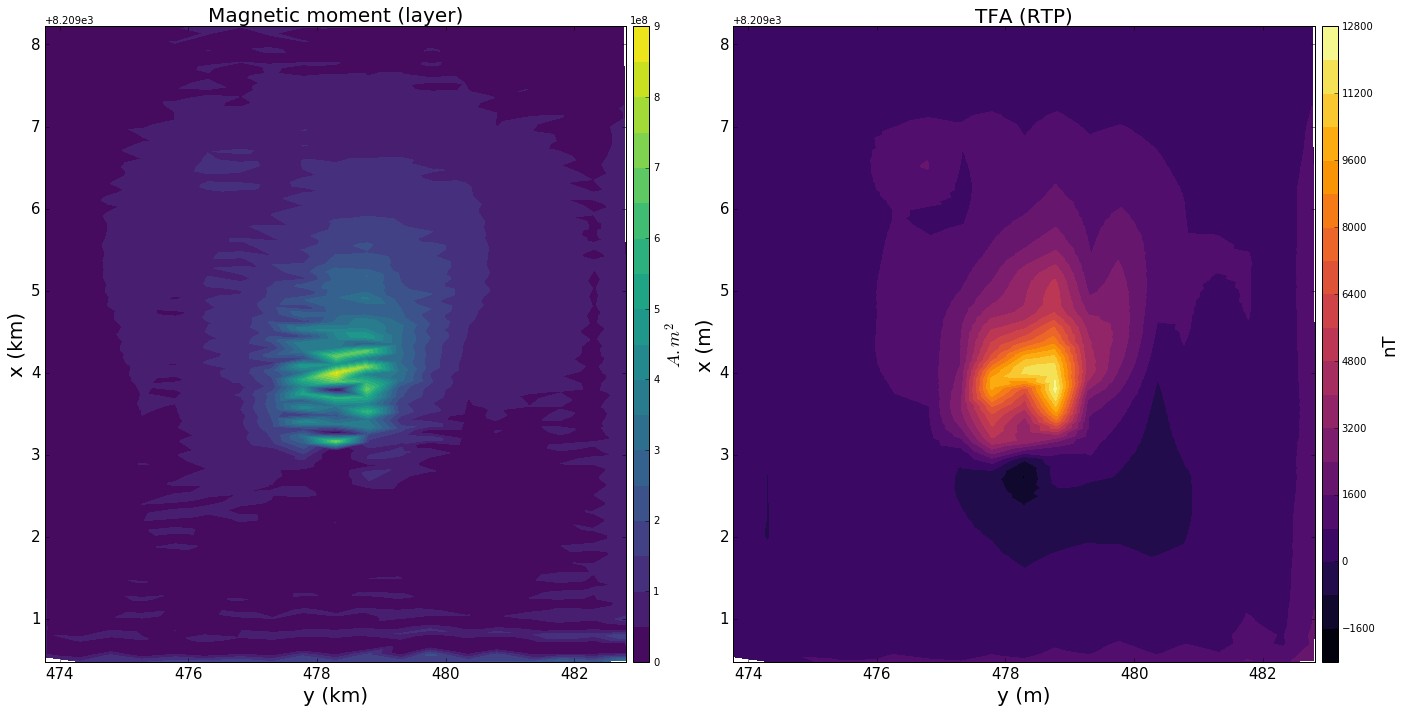

In [35]:
title_font = 20
bottom_font = 18
plt.close('all')
plt.figure(figsize=(20,10), tight_layout=True)

plt.subplot(1,2,1)
plt.tricontourf(1e-3*ys,1e-3*xs,m_LM,20,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('$A.m^2$',size=bottom_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.title('Magnetic moment (layer)', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)

plt.subplot(1,2,2)
plt.tricontourf(1e-3*data['y'], 1e-3*data['x'], tfa_rtp, 20, cmap='inferno')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('TFA (RTP)', fontsize=title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(labelsize=15)

file_name = 'figs/moment_RTP_Diorama_intrusion_LM_NNLS'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

## Results 

In [36]:
results_diorama['magnetic_moment'] = m_LM
results_diorama['inc_est'] = inc_est
results_diorama['dec_est'] = dec_est
results_diorama['layer_depth'] = h
results_diorama['reg_patameter'] = mu_pos
results_diorama['RTP'] = tfa_rtp
results_diorama['tfa_predicted'] = pred

## Generating .pickle file

In [37]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
results_diorama['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [38]:
file_name = 'data/results_diorama.pickle'
with open(file_name, 'w') as f:
    pickle.dump(results_diorama, f)

saved_files.append(file_name)


## Saved files

In [41]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/Diorama_decimated_12.png
2  figs/Diorama_decimated_12.eps
3  figs/Diorama_intrusion_convergence_LM_NNLS.png
4  figs/Diorama_intrusion_convergence_LM_NNLS.eps
5  figs/Diorama_intrusion_LM_NNLS.png
6  figs/Diorama_intrusion_LM_NNLS.eps
7  figs/Diorama_intrusion_moment_positive_LM_NNLS.png
8  figs/Diorama_intrusion_moment_positive_LM_NNLS.eps
9  figs/RTP_Diorama_intrusion_LM_NNLS.png
10  figs/RTP_Diorama_intrusion_LM_NNLS.eps
11  figs/moment_RTP_Diorama_intrusion_LM_NNLS.png
12  figs/moment_RTP_Diorama_intrusion_LM_NNLS.eps
13  data/results_diorama.pickle
